## 텍스트 분석
- 비정형 데이터를 분석하는 것
- 머신런이 알고리즘은 숫자형의 피처 기반 데이터만 입력받을 수 있기 때문에 텍스트를 머신러닝에 부여하기 위해서는 비정형 텍스트 데이터를 어떻게 피처 형태로 추출하고 추출된 피쳐에 의미 있는 값을 부여하는 것이 가장 중요한 요소

- 피처백터화/피처추출 > 텍스트를 word 기반의 다수 피처로 추출하고 이 피처에 단어 빈도수와 같은 숫자값을 부여하여 단어의 조합인 벡터로 표현하는 것

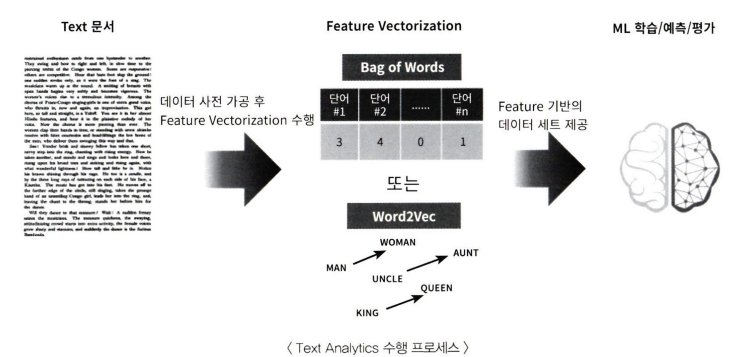

## 텍스트 정규화
- 텍스트를 머신러닝 알고리즘 등에 입력데이터로 사용하기 위해 클렌징 정제, 토큰화, 어근화 등의 다양한 텍스트 데이터의 사전 작업을 수행하는 것 의미
- 클렌징 > 텍스트 분석에 방해가 되는 불필요한 문자, 기호 등을 사전에 제거하는 작업
- 텍스트 토큰화 > 문서에서 문장을 분리하는 문장 토큰화와 문장에서 단어를 토큰으로 분리하는 단어 토큰화로 나뉨

In [2]:
# 문장 토큰화
from nltk import sent_tokenize
import nltk
nltk.download('punkt')
text_sample='The Matrix is everywhere its all around us, here even in this room. \
You can see it out your window or on your television. \
You feel it when you go to work, or go to church or pay your taxes'
sentences=sent_tokenize(text=text_sample)
print(type(sentences),len(sentences))
# 반환된 list 객체가 3개의 문장으로 된 문자열을 각각 가지고 있음을 확인
print(sentences)

<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MYCOM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# 단어 토큰화 
from nltk import word_tokenize
sentences='The Matrix is everywhere its all around us, here even in this room'
words=word_tokenize(sentences)
print(type(words),len(words))
print(words)

<class 'list'> 14
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room']


In [4]:
# 3개의 문장으로 된 text_sample을 문장별로 단어 토큰화 적용하기
def tokenize_text(text):
    # 문장별로 분리 토큰
    sentences=sent_tokenize(text)
    # 분리된 문장별 단어 토큰화
    word_tokens=[word_tokenize(sentence) for sentence in sentences]
    return word_tokens

word_tokens=tokenize_text(text_sample)
print(type(word_tokens),len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes']]


## Stop Word 제거
- 분석에 큰 의미가 없는 단어 지칭
- 언어별로 스톱 워드가 목록화 되어 있음

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MYCOM\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [6]:
print('영어 stop words 개수', len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 개수 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [10]:
# 위 문장에서 stop words 제거 필터링
stopwords=nltk.corpus.stopwords.words('english')
all_tokens=[]
for sentence in word_tokens:
    filtered_words=[]
    for word in sentence:
        # 소문자로 모두 변환
        word=word.lower()
        if word not in stopwords:
            filtered_words.append(word)
    all_tokens.append(filtered_words)

print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes']]


## Stemming 과 Lemmatization
- 문법적 또는 의미적으로 변화하는 단어의 원형을 찾는 것
- lemmatizaiton이 stemming보다 정교하며 의미론적인 기바에서 단어의 원형을 찾음. 
- stemming은 원형 단어로 변환시 일반적인 방법을 적용하거나 더 단순화한 방법을 적용해 원래 단어에서 일부 철자가 훼손된 어근 단어를 추출하는 경향이 있음
- lemmatization은 품사와 같은 문법적인 요소와 더 의미적인 부분을 감안해 정확한 철자로 된 어근 단어를 찾아줌

In [11]:
from nltk.stem import LancasterStemmer
stemmer=LancasterStemmer()
print(stemmer.stem('working'),stemmer.stem('works'),stemmer.stem('worked'))
print(stemmer.stem('amusing'),stemmer.stem('amuses'),stemmer.stem('amused'))
print(stemmer.stem('happier'),stemmer.stem('happiest'))
print(stemmer.stem('fancier'),stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


In [13]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\MYCOM\AppData\Roaming\nltk_data...


True

In [14]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemma=WordNetLemmatizer()
print(lemma.lemmatize('amusing','v'),lemma.lemmatize('amuses','v'),lemma.lemmatize('amused','v'))
print(lemma.lemmatize('happier','a'),lemma.lemmatize('happiest','a'))
print(lemma.lemmatize('fancier','a'),lemma.lemmatize('fanciest','a'))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MYCOM\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


amuse amuse amuse
happy happy
fancy fancy


## Bag of Words
- 문서가 가지는 모든 단어를 문맥이나 순서를 무시하고 일괄적으로 단어에 대해 빈도값을 부여해 피처를 추출하는 모델
- BOW 기반 NLP연구의 대표적인 단점 
1) 문맥의미반영부족, 2) 희소행렬문제 (대규모 칼럼으로 구성된 행렬에서 대부분의 값이 0으로 채워지는 행령 의미, ML 알고리즘의 수행시간과 예측 성능을 떨어트림)

## BOW 피처 벡터화
- 카운트 기반의 벡터화 > 해당 단어가 나타는 횟수 count를 부여하는 경우, 하지만 카운트만 부여할 경우 그 문서의 특징을 나타내기보다는 언어의 특성상 문자에서 자주 사용될 수밖에 없는 단어까지 높은 값을 부여하게 됨
- TF-IDF(Term Frequency- Inverse Document Frequency) 기반의 벡터화 > 개별 문서에서 자주 나타나는 단어에 높은 가중치를 주되, 모든 문서에서 전반적으로 자주 나타나는 단어에 대해서는 패널티를 주는 방식으로 값을 부여

## 사이킷런의 CountVectorizer
- 하이퍼파라미터 설명
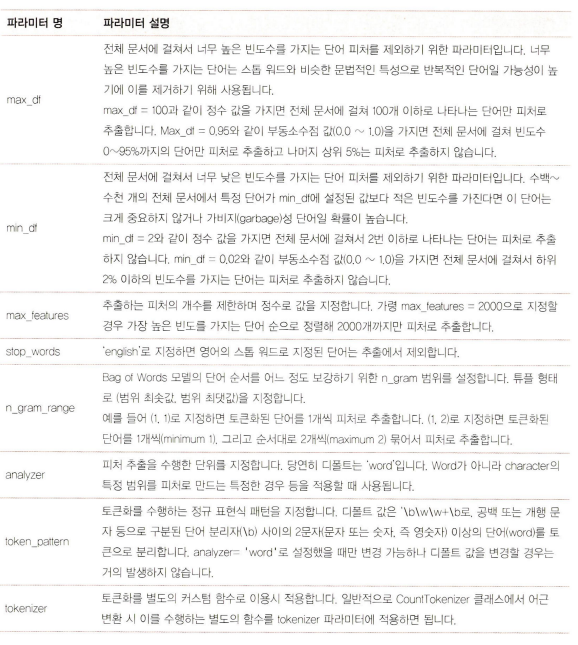
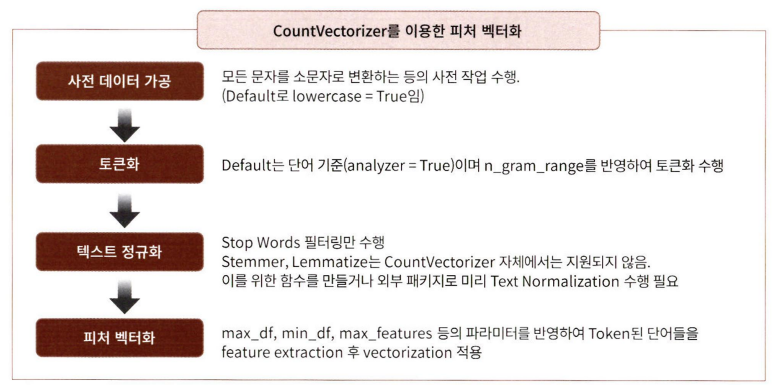

## BOW 벡터화를 위한 희소 행렬
### COO 형식
- 0이 아닌 데이터만 별도의 데이터 배열로 저장하고 그 데이터가 가르키는 행과 열의 위치를 별도의 배열로 저장하는 방식

In [17]:
from scipy import sparse
import numpy as np
# 0이 아닌 데이터 추출
data=np.array([3,1,2])
# 행과 열 위치를 갂가 배열로 생성
row_pos=np.array([0,0,1])
col_pos=np.array([0,2,1])
sparse_coo=sparse.coo_matrix((data,(row_pos,col_pos)))
# 다시 밀집 형태의 행렬로 출력
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

### CSR 형식
- COO 형식이 행과 열의 위치를 나타내기 위해 반복적인 위치 데이터를 사용해야 하는 문제점을 해결한 방식

In [18]:
from scipy import sparse
dense=np.array([[0,0,1,0,0,5],
                [1,4,0,3,2,5],
                [0,6,0,3,0,0],
                [2,0,0,0,0,0],
                [0,0,0,7,0,0],
                [1,0,0,0,0,0]])
data2=np.array([1,5,1,4,3,2,5,6,3,2,7,8,1])
row_pos=np.array([0,0,1,1,1,1,1,2,2,3,4,4,5])
col_pos=np.array([2,5,0,1,3,4,5,1,3,0,3,5,0])
# COO 형식으로 변환
sparse_coo=sparse.coo_matrix((data2,(row_pos,col_pos)))
# 행 위치 배열의 고유한 값의 시작 위치 인덱스를 배열로 생성
row_pos_ind=np.array([0,2,7,9,10,12,13])
sparse_csr=sparse.csr_matrix((data2,(row_pos,col_pos)))
print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [21]:
# 시리제 사용시 다음과 같이 밀집 행렬을 생성 파라미터로 입력하여 희소행렬 생성
dense3=np.array([[0,0,1,0,0,5],
                [1,4,0,3,2,5],
                [0,6,0,3,0,0],
                [2,0,0,0,0,0],
                [0,0,0,7,0,8],
                [1,0,0,0,0,0]])
coo=sparse.coo_matrix(dense3)
csr=sparse.csr_matrix(dense3)
print(coo)
print('####################')
print(csr)

  (0, 2)	1
  (0, 5)	5
  (1, 0)	1
  (1, 1)	4
  (1, 3)	3
  (1, 4)	2
  (1, 5)	5
  (2, 1)	6
  (2, 3)	3
  (3, 0)	2
  (4, 3)	7
  (4, 5)	8
  (5, 0)	1
####################
  (0, 2)	1
  (0, 5)	5
  (1, 0)	1
  (1, 1)	4
  (1, 3)	3
  (1, 4)	2
  (1, 5)	5
  (2, 1)	6
  (2, 3)	3
  (3, 0)	2
  (4, 3)	7
  (4, 5)	8
  (5, 0)	1
